# New York City flights 2013

This project analyzes data about commercial flights from New York City airports in 2013.

We will perform the following steps:
1. Selection: Describing and exploring data set, identifying questions of interest
2. Wrangling: Bringing data into format suitable for analysis, incl. documenting major design choices
3. Analysis: Answering questions of interest, visualizing results with charts

## Part 1: Selection

In this part we describe the data set we selected, where it is from, and why we selected it. Then, we perform data exploration to become familiar with the data. Lastly, we define the questions we want to answer about the data in this project.

#### What
In this project, we analyze flight data about commercial flights from any New York City airport in 2013. 

#### Where from 
This data set is provided as part of Haley Wickham's ncyflights13 R package. 

#### Why 
This data set is appealing to us for several reasons. First, flights and aviation are genuinely interesting topics. Second, the data set contains a large enough number of rows to allow interesting analyses, but not too many to make execution of our code very slow. Third, the data set allows meaningful integration with other data sets, such as weather data for specific days and airports.

#### Data exploration
In the cells following below, we perform data exploration to become familiar with our data set. Among others, we will explore the following:
* Number of entries
* Number and meaning of columns
* Data types of attributes
* Existence of null values
* Existence of other issues to be addressed in wrangling step
* Different data splits

In [1]:
!wget https://s3.amazonaws.com/dmfaproject4flightsdata/flights.csv

--2018-12-24 07:41:20--  https://s3.amazonaws.com/dmfaproject4flightsdata/flights.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.176.101
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.176.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36662955 (35M) [text/csv]
Saving to: ‘flights.csv.2’

flights.csv.2       100%[===================>]  34.96M  48.5MB/s    in 0.7s    

2018-12-24 07:41:21 (48.5 MB/s) - ‘flights.csv.2’ saved [36662955/36662955]



In [2]:
!wc -l flights.csv

336777 flights.csv


Our data set has 336777 entries.

In [3]:
!csvcut -n flights.csv

  1: 
  2: year
  3: month
  4: day
  5: dep_time
  6: sched_dep_time
  7: dep_delay
  8: arr_time
  9: sched_arr_time
 10: arr_delay
 11: carrier
 12: flight
 13: tailnum
 14: origin
 15: dest
 16: air_time
 17: distance
 18: hour
 19: minute
 20: time_hour


Our data set has 20 columns, including one column with no header.

In [4]:
!head -n 5 flights.csv | csvcut -c1-10 | csvlook

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
| a |  year | month |  day | dep_time | sched_dep_time | dep_delay | arr_time | sched_arr_time | arr_delay |
| - | ----- | ----- | ---- | -------- | -------------- | --------- | -------- | -------------- | --------- |
| 1 | 2,013 |  True | True |      517 |            515 |         2 |      830 |            819 |        11 |
| 2 | 2,013 |  True | True |      533 |            529 |         4 |      850 |            830 |        20 |
| 3 | 2,013 |  True | True |      542 |            540 |         2 |      923 |            850 |        33 |
| 4 | 2,013 |  True | True |      544 |            545 |        -1 |    1,004 |          1,022 |       -18 |


The first column seems to be an index column. Time has an interesting format (hmin), something that potentially needs wrangling. Also, month and day are interpreted by csvlook as True, they should be 1s though--another aspect that needs to be checked.

In [5]:
!head -n 5 flights.csv | csvcut -c11-20 | csvlook

| carrier | flight | tailnum | origin | dest | air_time | distance | hour | minute |           time_hour |
| ------- | ------ | ------- | ------ | ---- | -------- | -------- | ---- | ------ | ------------------- |
| UA      |  1,545 | N14228  | EWR    | IAH  |      227 |    1,400 |    5 |     15 | 2013-01-01 05:00:00 |
| UA      |  1,714 | N24211  | LGA    | IAH  |      227 |    1,416 |    5 |     29 | 2013-01-01 05:00:00 |
| AA      |  1,141 | N619AA  | JFK    | MIA  |      160 |    1,089 |    5 |     40 | 2013-01-01 05:00:00 |
| B6      |    725 | N804JB  | JFK    | BQN  |      183 |    1,576 |    5 |     45 | 2013-01-01 05:00:00 |


These columns all look good and also super interesting. We can definitely do some interesting analysis here.

In [6]:
!head -n 1000 flights.csv | csvstat --type

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
  1. a: Number
  2. year: Number
  3. month: Boolean
  4. day: Number
  5. dep_time: Number
  6. sched_dep_time: Number
  7. dep_delay: Number
  8. arr_time: Number
  9. sched_arr_time: Number
 10. arr_delay: Number
 11. carrier: Text
 12. flight: Number
 13. tailnum: Text
 14. origin: Text
 15. dest: Text
 16. air_time: Number
 17. distance: Number
 18. hour: Number
 19. minute: Number
 20. time_hour: DateTime


Our data types look good, besides month. It should be a number but csvkit interprets it as a boolean. This might just be because it is the number 1 for January. However, this is definitely something we need pay attention to when in the wrangling part.

In [7]:
!head -n 5000 flights.csv | csvstat --nulls

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
  1. a: False
  2. year: False
  3. month: False
  4. day: False
  5. dep_time: True
  6. sched_dep_time: False
  7. dep_delay: True
  8. arr_time: True
  9. sched_arr_time: False
 10. arr_delay: True
 11. carrier: False
 12. flight: False
 13. tailnum: True
 14. origin: False
 15. dest: False
 16. air_time: True
 17. distance: False
 18. hour: False
 19. minute: False
 20. time_hour: False


There are several columns with null values in them. We need to pay attention to this when wrangling the data.

Let us know look at some meaningful data splits to become even more familiar with our data.

In [8]:
!head -n 5000 flights.csv | csvstat -c 11 --freq

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
{ "B6": 920, "UA": 888, "DL": 709, "EV": 702, "AA": 533 }


In this subset of our data, JetBlue, United, Delta, ExpressJet, and American operated the most flights. This is not surprising. JetBlue and ExpressJet have their hubs at JFK and Newark, respectively. And United, Delta, American are the largest airlines in the US. 

In [9]:
!head -n 5000 flights.csv | csvstat -c 14 --freq

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
{ "EWR": 1811, "JFK": 1793, "LGA": 1395 }


The number of flights from the three NYC airports are pretty evenly split in this subset of our data. Newark has a slight edge over JFK and LaGuardia.

In [11]:
!head -n 5000 flights.csv | csvstat -c 10 

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
 10. "arr_delay"

	Type of data:          Number
	Contains null values:  True (excluded from calculations)
	Unique values:         235
	Smallest value:        -70
	Largest value:         851
	Sum:                   27,108
	Mean:                  5.477
	Median:                -1
	StDev:                 37.078
	Most common values:    -9 (117x)
	                       -4 (115x)
	                       -10 (115x)
	                       -2 (112x)
	                       -6 (112x)

Row count: 4999


## [comments]: do you think 5000 is enough to draw conclusions on frequencies? 

The above statistics refer to the arrival delay of the flights in the subset. The largest and smalles values are interesting. The smalles value states that one flight arrived 70 minutes before scheduled arrival. Figuring out how that happened would be an interesting analysis by itself. The largest value states that one flight was delayed by 851 minutes (14+ hours). A positive takeaway here is that both the mean and median arrival delays are close to zero, meaning that generally flights arrive on time.

#### Questions we will answer in this project
The delay column allows us to ask some exciting questions:
* Do some airlines have higher delays than others?
* Does one airport have higher delays than others?
* Do delays depend on the day of week?
* Do delays depend on the time of day?
* Is there any relation between delay and month(season)?
* Are longer flights more or less delayed than shorter flights?
* In combination with weather data: does the weather influence delays?

We will analyze and answer some of the above questions in this project.


## Part 2: Wrangling 

We wrangled the data set with Trifacta Wrangler using the below recipe.

In [12]:
!wget https://s3.amazonaws.com/dmfaproject4flightsdata/recipe_part1.png
!wget https://s3.amazonaws.com/dmfaproject4flightsdata/recipe_part2.png
!wget https://s3.amazonaws.com/dmfaproject4flightsdata/recipe_part3.png

--2018-12-24 07:42:53--  https://s3.amazonaws.com/dmfaproject4flightsdata/recipe_part1.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.81.187
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.81.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174438 (170K) [image/png]
Saving to: ‘recipe_part1.png.2’

recipe_part1.png.2  100%[===================>] 170.35K  --.-KB/s    in 0.009s  

2018-12-24 07:42:53 (18.6 MB/s) - ‘recipe_part1.png.2’ saved [174438/174438]

--2018-12-24 07:42:53--  https://s3.amazonaws.com/dmfaproject4flightsdata/recipe_part2.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.81.187
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.81.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202317 (198K) [image/png]
Saving to: ‘recipe_part2.png.2’

recipe_part2.png.2  100%[===================>] 197.58K  --.-KB/s    in 0.007s  

2018-12-24 07:42:53 (29.1 MB/s) - ‘recipe_part2.png.2’ sav

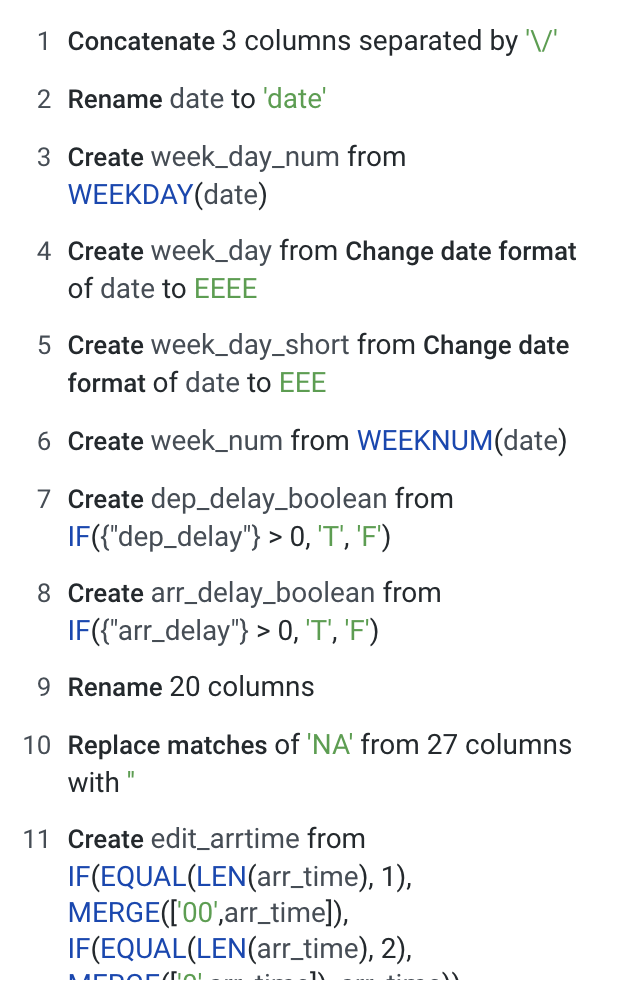

In [12]:
from IPython.display import Image
Image(filename='recipe_part1.png')

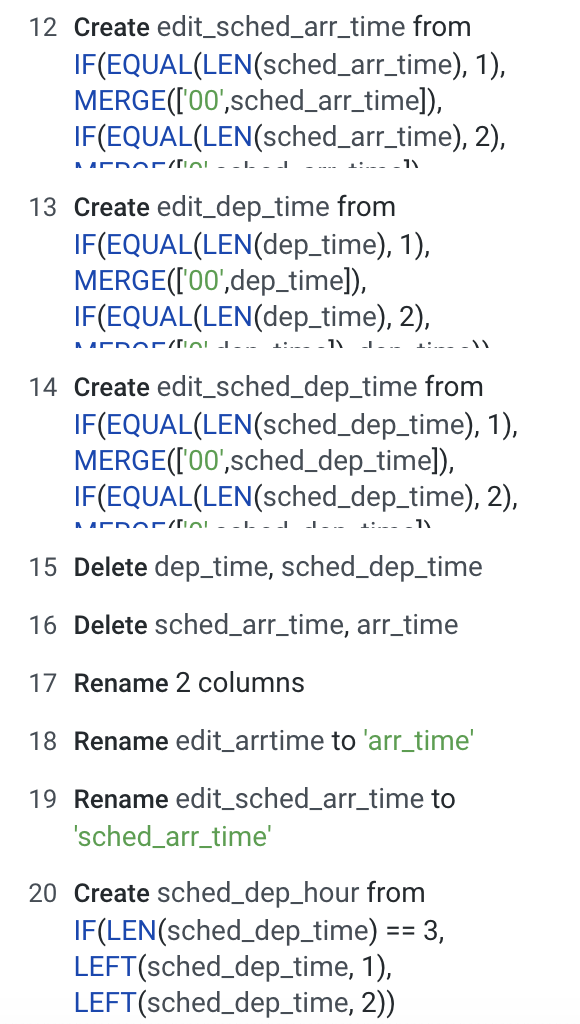

In [13]:
from IPython.display import Image
Image(filename='recipe_part2.png')

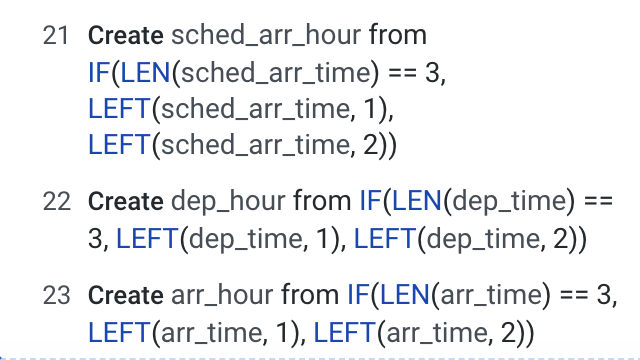

In [14]:
from IPython.display import Image
Image(filename='recipe_part3.png')

We had to come back to Trifacta and modify the recipe several times when we were working on this project. This was because as we continued our project, created a schema, and performed analyses, we realized that some aspects of the data were the way we wanted them to be. Therefore, we went back to Trifacta and fixed these aspects--it was an iterative process. This is not surprising. We have experienced the same iterative process on other projects before, both in school and in the workplace.
## [comment]: "some aspect of the data were NOT the way we wanted to be" ?
## [comment]: what is the way you want to be?
## [comment]: receipe part 1 image is cut 

We import the wrangled data from our S3 bucket and check if everything looks as expected.

In [13]:
!wget https://s3.amazonaws.com/dmfaproject4flightsdata/flights_trifacta8.csv

--2018-12-24 07:45:54--  https://s3.amazonaws.com/dmfaproject4flightsdata/flights_trifacta8.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.130.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.130.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74591253 (71M) [text/csv]
Saving to: ‘flights_trifacta8.csv.2’

flights_trifacta8.c 100%[===================>]  71.14M  47.6MB/s    in 1.5s    

2018-12-24 07:45:56 (47.6 MB/s) - ‘flights_trifacta8.csv.2’ saved [74591253/74591253]



In [14]:
!wc -l flights_trifacta8.csv

336777 flights_trifacta8.csv


In [15]:
!csvcut -n flights_trifacta8.csv

  1: id
  2: year
  3: month
  4: day
  5: date
  6: week_num
  7: week_day_short
  8: week_day
  9: week_day_num
 10: dep_time
 11: dep_hour
 12: sched_dep_time
 13: sched_dep_hour
 14: dep_delay
 15: dep_delay_boolean
 16: arr_time
 17: arr_hour
 18: sched_arr_time
 19: sched_arr_hour
 20: arr_delay
 21: arr_delay_boolean
 22: carrier
 23: flight
 24: tailnum
 25: origin
 26: dest
 27: air_time
 28: distance
 29: hour
 30: minute
 31: time_hour


In [16]:
!head -n 1000 flights_trifacta8.csv | csvstat

  1. "id"

	Type of data:          Text
	Contains null values:  False
	Unique values:         999
	Longest value:         5 characters
	Most common values:    "1" (1x)
	                       "2" (1x)
	                       "3" (1x)
	                       "4" (1x)
	                       "5" (1x)

  2. "year"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2,013
	Largest value:         2,013
	Sum:                   2,010,987
	Mean:                  2,013
	Median:                2,013
	StDev:                 0
	Most common values:    2,013 (999x)

  3. "month"

	Type of data:          Boolean
	Contains null values:  False
	Unique values:         1
	Most common values:    True (999x)

  4. "day"

	Type of data:          Number
	Contains null values:  False
	Unique values:         2
	Smallest value:        1
	Largest value:         2
	Sum:                   1,156
	Mean:                  1.157
	Median:                1
	StDe

Looks all good. We are ready to create a star schema.

First, let's create the table flight_facts:

In [17]:
%load_ext sql

In [18]:
!dropdb --if-exists -U student project4

In [19]:
!createdb -U student project4

In [20]:
%sql postgresql://student@/project4

'Connected: student@project4'

We want to upload the data from Trifacta into our PostgreSQL database. Because we have empty values in our data, this will require a three step process:
1. Create table where all integer columns are endcoded as characters and upload the data
2. Convert missing values into proper NULLs
3. Convert integer columns encoded as characters back to integers

In the cell below, we start with step 1: creating an all character table.

In [21]:
%%sql
DROP TABLE IF EXISTS flight_facts;

CREATE TABLE flight_facts (
    object_id VARCHAR(20) ,
    year VARCHAR(20) ,
    month VARCHAR(20) ,
    day VARCHAR(20),
    date DATE ,
    week_num VARCHAR(20),
    week_day_short VARCHAR(20) ,
    week_day VARCHAR(20) ,
    week_day_num VARCHAR(20) ,
    dep_time VARCHAR(20) ,
    dep_hour VARCHAR(20),
    sched_dep_time VARCHAR(20),
    sched_dep_hour VARCHAR(20),
    dep_delay VARCHAR(20),
    dep_delay_boolean BOOLEAN ,
    arr_time VARCHAR(20),
    arr_hour VARCHAR(20),
    sched_arr_time VARCHAR(20) , 
    sched_arr_hour VARCHAR(20),
    arr_delay  VARCHAR(20),
    arr_delay_boolean BOOLEAN,
    carrier VARCHAR(20),
    flight VARCHAR(20),
    tailnum VARCHAR(20),
    origin VARCHAR(20),
    dest VARCHAR(20),
    air_time VARCHAR(20),
    distance VARCHAR(20),
    hour VARCHAR(20),
    minute VARCHAR(20),
    time_hour TIMESTAMPTZ
)

 * postgresql://student@/project4
Done.
Done.


[]

In [22]:
!cp flights_trifacta8.csv /tmp/mydf.csv

In [23]:
%%sql
COPY flight_facts FROM '/tmp/mydf.csv'
CSV
HEADER;

 * postgresql://student@/project4
336776 rows affected.


[]

In [24]:
%%sql
SELECT COUNT(*) FROM flight_facts

 * postgresql://student@/project4
1 rows affected.


count
336776


We have all rows updated.

Step 2: We convert the missing values into nulls. 
## [comment] a missing value is a null value???

In [25]:
%%sql
UPDATE flight_facts
SET dep_time = NULL
WHERE dep_time = ''

 * postgresql://student@/project4
8255 rows affected.


[]

In [26]:
%%sql
UPDATE flight_facts
SET dep_delay = NULL
WHERE dep_delay = ''

 * postgresql://student@/project4
8255 rows affected.


[]

In [27]:
%%sql
UPDATE flight_facts
SET arr_time = NULL
WHERE arr_time = ''

 * postgresql://student@/project4
8713 rows affected.


[]

In [28]:
%%sql
UPDATE flight_facts
SET arr_delay = NULL
WHERE arr_delay = ''

 * postgresql://student@/project4
9430 rows affected.


[]

In [29]:
%%sql
UPDATE flight_facts
SET tailnum = NULL
WHERE tailnum = ''

 * postgresql://student@/project4
2512 rows affected.


[]

In [30]:
%%sql
UPDATE flight_facts
SET air_time = NULL
WHERE air_time = ''

 * postgresql://student@/project4
9430 rows affected.


[]

In [31]:
%%sql
UPDATE flight_facts
SET dep_hour = NULL
WHERE dep_hour = ''

 * postgresql://student@/project4
8255 rows affected.


[]

In [32]:
%%sql
UPDATE flight_facts
SET arr_hour = NULL
WHERE arr_hour = ''

 * postgresql://student@/project4
8713 rows affected.


[]

We check if the conversion into nulls worked.

In [33]:
%%sql
SELECT *
FROM flight_facts
WHERE arr_time IS NULL
LIMIT 3

 * postgresql://student@/project4
3 rows affected.


object_id,year,month,day,date,week_num,week_day_short,week_day,week_day_num,dep_time,dep_hour,sched_dep_time,sched_dep_hour,dep_delay,dep_delay_boolean,arr_time,arr_hour,sched_arr_time,sched_arr_hour,arr_delay,arr_delay_boolean,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
"""1757""",2013,1,2,2013-01-02,1,Wed,Wednesday,3,2145,21,2129,21,16,True,None,None,033,0,None,False,"""UA""",1299,"""N12221""","""EWR""","""RSW""",None,1068,21,29,2013-01-02 21:00:00+00:00
"""11246""",2013,1,13,2013-01-13,3,Sun,Sunday,7,2239,22,2159,21,40,True,None,None,030,0,None,False,"""EV""",4519,"""N17196""","""EWR""","""BWI""",None,169,21,59,2013-01-13 21:00:00+00:00
"""15851""",2013,1,18,2013-01-18,3,Fri,Friday,5,None,None,825,8,None,False,None,None,1026,10,None,False,"""US""",487,None,"""JFK""","""CLT""",None,541,8,25,2013-01-18 08:00:00+00:00


It worked. We can see entries called 'None', which is PostgreSQL name for nulls.

Next step 3: we convert the numeric columns back to integers.

In [34]:
%%sql
ALTER TABLE flight_facts
ALTER COLUMN dep_delay TYPE INT using dep_delay::integer,
ALTER COLUMN arr_delay TYPE INT using arr_delay::integer,
ALTER COLUMN distance TYPE INT using distance::integer,
ALTER COLUMN air_time TYPE INT using air_time::integer,
ALTER COLUMN year TYPE INT using year::integer,
ALTER COLUMN month TYPE INT using month::integer,
ALTER COLUMN day TYPE INT using day::integer,
ALTER COLUMN sched_dep_time TYPE INT using sched_dep_time::integer,
ALTER COLUMN dep_time TYPE INT using dep_time::integer,
ALTER COLUMN arr_time TYPE INT using arr_time::integer,
ALTER COLUMN sched_arr_time TYPE INT using sched_arr_time::integer,
ALTER COLUMN hour TYPE INT using hour::integer,
ALTER COLUMN sched_arr_hour TYPE INT using sched_arr_hour::integer,
ALTER COLUMN sched_dep_hour TYPE INT using sched_dep_hour::integer,
ALTER COLUMN dep_hour TYPE INT using dep_hour::integer,
ALTER COLUMN arr_hour TYPE INT using arr_hour::integer

 * postgresql://student@/project4
Done.


[]

For our arr_hour variable, we converted 24 into 0 as they all represents 12 am.

In [35]:
%%sql
UPDATE flight_facts
SET arr_hour = 0
WHERE arr_hour = 24

 * postgresql://student@/project4
150 rows affected.


[]

We drop some columns that we do not need in our schema.

In [36]:
%%sql
ALTER TABLE flight_facts 
DROP COLUMN IF EXISTS week_day_short,
DROP COLUMN IF EXISTS week_day_num,
DROP COLUMN IF EXISTS dep_delay_boolean,
DROP COLUMN IF EXISTS arr_delay_boolean,
DROP COLUMN IF EXISTS minute,
DROP COLUMN IF EXISTS time_hour

 * postgresql://student@/project4
Done.


[]

Our flights table is now finished. We can start building our schema. See the picture below for an illustration of our schema.

In [37]:
!wget https://s3.amazonaws.com/dmfa-project2/Screen+Shot+2018-12-10+at+12.02.33+PM.png

--2018-12-24 07:48:47--  https://s3.amazonaws.com/dmfa-project2/Screen+Shot+2018-12-10+at+12.02.33+PM.png
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.98.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.98.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276052 (270K) [image/png]
Saving to: ‘Screen+Shot+2018-12-10+at+12.02.33+PM.png.2’

Screen+Shot+2018-12 100%[===================>] 269.58K  --.-KB/s    in 0.007s  

2018-12-24 07:48:47 (37.6 MB/s) - ‘Screen+Shot+2018-12-10+at+12.02.33+PM.png.2’ saved [276052/276052]



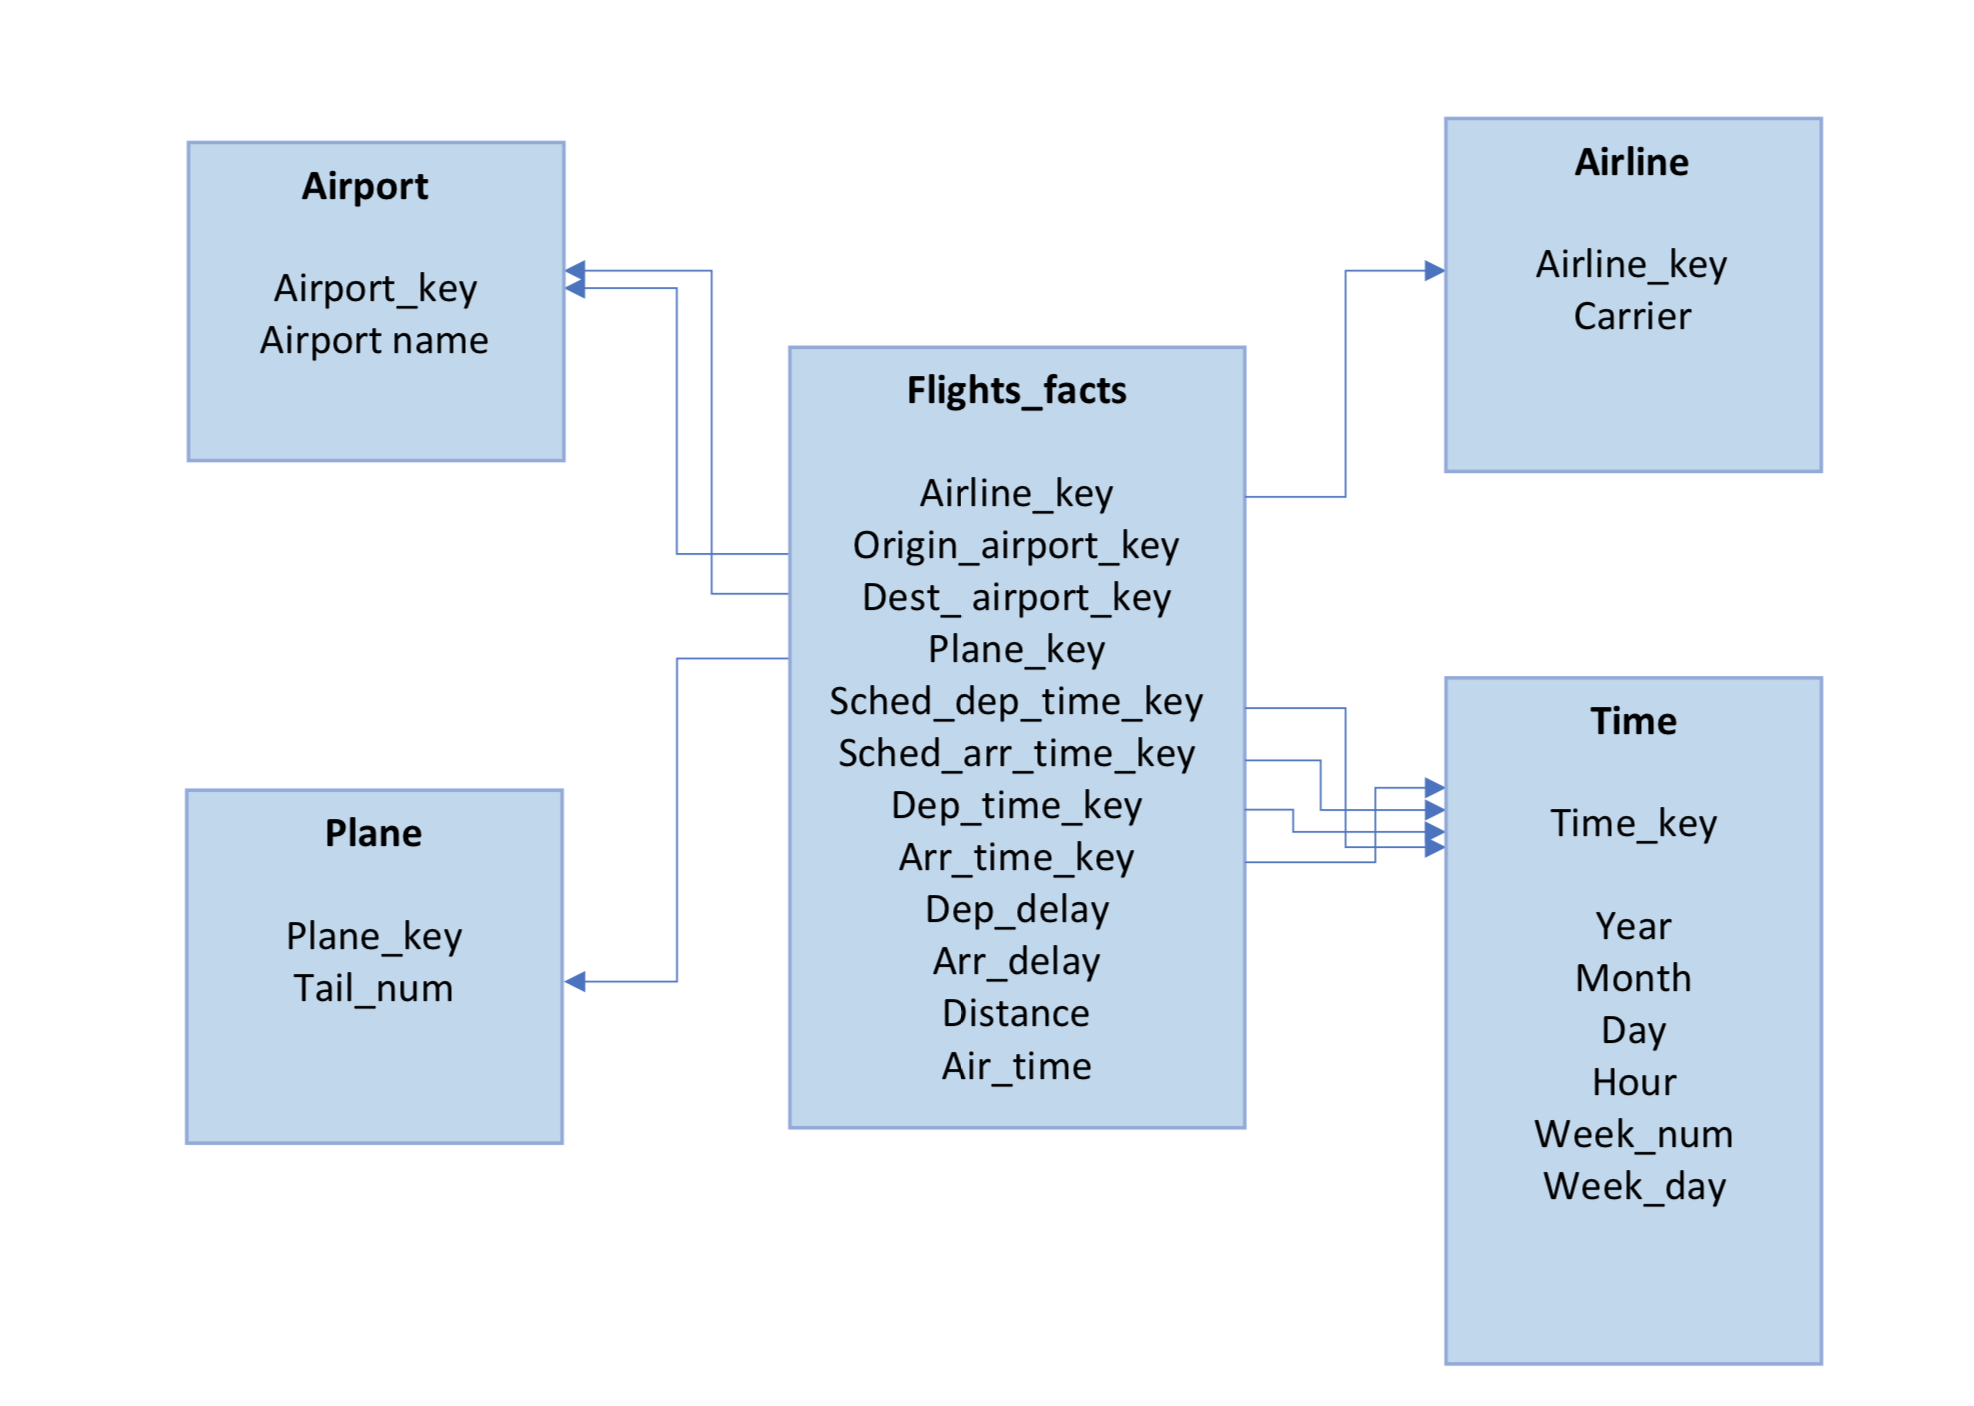

In [38]:
from IPython.display import Image
Image(filename='Screen+Shot+2018-12-10+at+12.02.33+PM.png')

Our schema contains one facts table and four dimension tables. The facts tables includes data on departure delay, arrival delay, distance, and air time of the flights. In addition, it contains all the keys to the dimensions. Our dimensions are split into airport, airline, time, and plane. Splitting the dimensions up like this allows us to easily add additional data to the schmema, such as longitude & latitude to the airport dimension or manufacturer & years in service to the plane dimension.

First, we are going to create the dimension table `airport`

let's extract some details like origin and dest.

In [39]:
%%sql
SELECT DISTINCT origin, dest
FROM flight_facts
LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


origin,dest
"""LGA""","""MSY"""
"""LGA""","""CMH"""
"""LGA""","""OMA"""
"""EWR""","""ALB"""
"""EWR""","""TYS"""
"""LGA""","""EYW"""
"""LGA""","""SDF"""
"""EWR""","""RIC"""
"""JFK""","""CLT"""
"""LGA""","""DSM"""


Now we can create the dimension table `airport` to house the dimension `name`

In [40]:
%%sql
DROP TABLE IF EXISTS airport;

CREATE TABLE airport (
    airport_key SERIAL PRIMARY KEY,
    name VARCHAR(20)
);

 * postgresql://student@/project4
Done.
Done.


[]

Populate the dimension table.

In [41]:
%%sql
INSERT INTO airport (name)
SELECT DISTINCT origin AS name 
FROM flight_facts
UNION
SELECT DISTINCT dest AS name
FROM flight_facts;

 * postgresql://student@/project4
107 rows affected.


[]

In [42]:
%%sql
SELECT * FROM airport
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


airport_key,name
1,"""SFO"""
2,"""HDN"""
3,"""DSM"""
4,"""GSP"""
5,"""BDL"""
6,"""SBN"""
7,"""MEM"""
8,"""ROC"""
9,"""SRQ"""
10,"""PIT"""


Now we add these new identifiers (surrogate key) back to the fact table.

In [43]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN origin_airport_key INTEGER,
ADD CONSTRAINT fk_origin_airport_key
    FOREIGN KEY (origin_airport_key)
    REFERENCES airport (airport_key);

 * postgresql://student@/project4
Done.


[]

create an index on all columns in `airport` to improve the performance of queries.

In [44]:
%%sql
DROP INDEX IF EXISTS idx_airport;

CREATE INDEX idx_airport ON airport (name)

 * postgresql://student@/project4
Done.
Done.


[]

Now we update the `origin_airport_key` in the fact table with the values from airport dimension table based on the name.

In [45]:
%%sql
UPDATE flight_facts
SET origin_airport_key = airport.airport_key
FROM airport
WHERE flight_facts.origin = airport.name 

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

We will drop `origin` later.

In [46]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN dest_airport_key INTEGER,
ADD CONSTRAINT fk_dest_airport_key
    FOREIGN KEY (dest_airport_key)
    REFERENCES airport (airport_key);

 * postgresql://student@/project4
Done.


[]

In [47]:
%%sql
UPDATE flight_facts
SET dest_airport_key = airport.airport_key
FROM airport
WHERE flight_facts.dest = airport.name 

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

We will drop `dest` later.

Now we are going to create the dimension table `plane`

In [48]:
%%sql
SELECT DISTINCT tailnum FROM flight_facts
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


tailnum
None
"""N716EV"""
"""N18112"""
"""N524SW"""
"""N5CRAA"""
"""N717JL"""
"""N6713Y"""
"""N513AS"""
"""N8619F"""
"""N338AA"""


In [49]:
%%sql
DROP TABLE IF EXISTS plane;

CREATE TABLE plane (
    plane_key SERIAL PRIMARY KEY,
    tailnum VARCHAR(20)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [50]:
%%sql
INSERT INTO plane (tailnum)
SELECT DISTINCT tailnum
FROM flight_facts

 * postgresql://student@/project4
4044 rows affected.


[]

In [51]:
%%sql
SELECT * FROM plane
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


plane_key,tailnum
1,None
2,"""N716EV"""
3,"""N18112"""
4,"""N524SW"""
5,"""N5CRAA"""
6,"""N717JL"""
7,"""N6713Y"""
8,"""N513AS"""
9,"""N8619F"""
10,"""N338AA"""


As we can see, there are null values in tailnum.

In [52]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN plane_key INTEGER,
ADD CONSTRAINT fk_plane_key
    FOREIGN KEY (plane_key)
    REFERENCES plane (plane_key);

 * postgresql://student@/project4
Done.


[]

In [53]:
%%sql
DROP INDEX IF EXISTS idx_plane;

CREATE INDEX idx_plane ON plane (tailnum);

 * postgresql://student@/project4
Done.
Done.


[]

In [54]:
%%sql
UPDATE flight_facts
SET plane_key = plane.plane_key
FROM plane
WHERE flight_facts.tailnum = plane.tailnum OR flight_facts.tailnum IS NULL AND plane.tailnum IS NULL
    

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

We will drop `tailnum` later.

Now we are going to create the dimension table `airline`

In [55]:
%%sql
SELECT DISTINCT carrier FROM flight_facts
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


carrier
"""VX"""
"""EV"""
"""9E"""
"""YV"""
"""AS"""
"""F9"""
"""OO"""
"""AA"""
"""HA"""
"""UA"""


In [56]:
%%sql
DROP TABLE IF EXISTS airline;

CREATE TABLE airline (
    airline_key SERIAL PRIMARY KEY,
    carrier VARCHAR(20)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [57]:
%%sql
INSERT INTO airline (carrier)
SELECT DISTINCT carrier
FROM flight_facts

 * postgresql://student@/project4
16 rows affected.


[]

In [58]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN airline_key INTEGER,
ADD CONSTRAINT fk_airline_key
    FOREIGN KEY (airline_key)
    REFERENCES airline (airline_key);

 * postgresql://student@/project4
Done.


[]

In [59]:
%%sql
DROP INDEX IF EXISTS idx_airline;

CREATE INDEX idx_airline ON airline (carrier);

 * postgresql://student@/project4
Done.
Done.


[]

In [60]:
%%sql
UPDATE flight_facts
SET airline_key = airline.airline_key
FROM airline
WHERE flight_facts.carrier = airline.carrier

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

We will drop `carrier` later.

Now we are going to create the dimension table `time`

In [61]:
%%sql
SELECT * FROM
flight_facts
LIMIT 1

 * postgresql://student@/project4
1 rows affected.


object_id,year,month,day,date,week_num,week_day,dep_time,dep_hour,sched_dep_time,sched_dep_hour,dep_delay,arr_time,arr_hour,sched_arr_time,sched_arr_hour,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,origin_airport_key,dest_airport_key,plane_key,airline_key
"""15368""",2013,1,18,2013-01-18,3,Friday,1338,13,1345,13,-7,1444,14,1458,14,-14,"""B6""",602,"""N178JB""","""JFK""","""PWM""",49,273,13,83,89,1791,16


In [62]:
%%sql
SELECT year, month, day, hour, date week_num, week_day, dep_time,dep_hour,arr_time,arr_hour,sched_dep_time,sched_dep_hour,sched_arr_time,sched_arr_hour FROM
flight_facts
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


year,month,day,hour,week_num,week_day,dep_time,dep_hour,arr_time,arr_hour,sched_dep_time,sched_dep_hour,sched_arr_time,sched_arr_hour
2013,1,18,13,2013-01-18,Friday,1338,13,1444,14,1345,13,1458,14
2013,1,18,13,2013-01-18,Friday,1340,13,1630,16,1345,13,1705,17
2013,1,18,13,2013-01-18,Friday,1342,13,1701,17,1345,13,1705,17
2013,1,18,13,2013-01-18,Friday,1344,13,1932,19,1341,13,1935,19
2013,1,18,13,2013-01-18,Friday,1345,13,1709,17,1345,13,1656,16
2013,1,18,13,2013-01-18,Friday,1345,13,1538,15,1350,13,1545,15
2013,1,18,13,2013-01-18,Friday,1346,13,1514,15,1350,13,1518,15
2013,1,18,13,2013-01-18,Friday,1346,13,1714,17,1350,13,1715,17
2013,1,18,13,2013-01-18,Friday,1350,13,1718,17,1355,13,1708,17
2013,1,18,13,2013-01-18,Friday,1352,13,1547,15,1357,13,1556,15


In [63]:
%%sql
DROP TABLE IF EXISTS time;

CREATE TABLE time (
    time_key SERIAL PRIMARY KEY,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    date DATE,
    hour INTEGER,
    week_num VARCHAR(20),
    week_day VARCHAR(20)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [64]:
%%sql
INSERT INTO time (year, month, day, date, hour, week_num, week_day)
SELECT DISTINCT year, month, day, date, sched_dep_hour,week_num, week_day
FROM flight_facts
UNION
SELECT DISTINCT year, month, day, date, sched_arr_hour,week_num, week_day
FROM flight_facts
UNION
SELECT DISTINCT year, month, day, date, arr_hour,week_num, week_day
FROM flight_facts
UNION
SELECT DISTINCT year, month, day, date, dep_hour,week_num, week_day
FROM flight_facts

 * postgresql://student@/project4
8948 rows affected.


[]

In [65]:
%%sql
SELECT * FROM time
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


time_key,year,month,day,date,hour,week_num,week_day
1,2013,1,1,2013-01-01,0,1,Tuesday
2,2013,1,1,2013-01-01,1,1,Tuesday
3,2013,1,1,2013-01-01,2,1,Tuesday
4,2013,1,1,2013-01-01,3,1,Tuesday
5,2013,1,1,2013-01-01,4,1,Tuesday
6,2013,1,1,2013-01-01,5,1,Tuesday
7,2013,1,1,2013-01-01,6,1,Tuesday
8,2013,1,1,2013-01-01,7,1,Tuesday
9,2013,1,1,2013-01-01,8,1,Tuesday
10,2013,1,1,2013-01-01,9,1,Tuesday


In [66]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN sched_dep_time_key INTEGER,
ADD CONSTRAINT fk_sched_dep_time_key
    FOREIGN KEY (sched_dep_time_key)
    REFERENCES time(time_key);

 * postgresql://student@/project4
Done.


[]

In [67]:
%%sql
DROP INDEX IF EXISTS idx_time;

CREATE INDEX idx_time ON time (year, month, day, hour, week_num, week_day);

 * postgresql://student@/project4
Done.
Done.


[]

In [68]:
%%sql
UPDATE flight_facts
SET sched_dep_time_key = time.time_key
FROM time
WHERE flight_facts.year = time.year
    AND flight_facts.month = time.month 
    AND flight_facts.day = time.day
    AND flight_facts.date = time.date
    AND flight_facts.sched_dep_hour = time.hour
    AND flight_facts.week_num = time.week_num
    AND flight_facts.week_day = time.week_day

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

In [69]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN sched_arr_time_key INTEGER,
ADD CONSTRAINT fk_sched_arr_time_key
    FOREIGN KEY (sched_arr_time_key)
    REFERENCES time(time_key);

 * postgresql://student@/project4
Done.


[]

In [70]:
%%sql
UPDATE flight_facts
SET sched_arr_time_key = time.time_key
FROM time
WHERE flight_facts.year = time.year
    AND flight_facts.month = time.month 
    AND flight_facts.day = time.day
    AND flight_facts.date = time.date
    AND flight_facts.sched_arr_hour = time.hour
    AND flight_facts.week_num = time.week_num
    AND flight_facts.week_day = time.week_day

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

In [71]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN dep_time_key INTEGER,
ADD CONSTRAINT fk_dep_time_key
    FOREIGN KEY (dep_time_key)
    REFERENCES time(time_key);

 * postgresql://student@/project4
Done.


[]

In [72]:
%%sql
UPDATE flight_facts
SET dep_time_key = time.time_key
FROM time
WHERE flight_facts.year = time.year
    AND flight_facts.month = time.month 
    AND flight_facts.day = time.day
    AND flight_facts.date = time.date
    AND flight_facts.dep_hour = time.hour OR flight_facts.dep_hour IS NULL AND time.hour IS NULL
    AND flight_facts.week_num = time.week_num
    AND flight_facts.week_day = time.week_day

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

In [73]:
%%sql
ALTER TABLE flight_facts
ADD COLUMN arr_time_key INTEGER,
ADD CONSTRAINT fk_arr_time_key
    FOREIGN KEY (arr_time_key)
    REFERENCES time(time_key);

 * postgresql://student@/project4
Done.


[]

In [74]:
%%sql
UPDATE flight_facts
SET arr_time_key = time.time_key
FROM time
WHERE flight_facts.year = time.year
    AND flight_facts.month = time.month 
    AND flight_facts.day = time.day
    AND flight_facts.date = time.date
    AND flight_facts.arr_hour = time.hour OR flight_facts.arr_hour IS NULL AND time.hour IS NULL
    AND flight_facts.week_num = time.week_num
    AND flight_facts.week_day = time.week_day

 * postgresql://student@/project4
336776 rows affected.


[]

We have all rows updated.

We can now remove all columns in `flight_facts` that are not facts nor foreign keys of dimension tables, with the exception of the date column, which we leave in as it will be necessary to study the affects of weather on flight delay later.

In [75]:
%%sql
ALTER TABLE flight_facts
DROP COLUMN year,
DROP COLUMN month,
DROP COLUMN day,
DROP COLUMN hour,
DROP COLUMN week_num,
DROP COLUMN week_day,
DROP COLUMN sched_dep_time, 
DROP COLUMN sched_arr_time, 
DROP COLUMN dep_time, 
DROP COLUMN arr_time,
DROP COLUMN origin,
DROP COLUMN dest,
DROP COLUMN tailnum,
DROP COLUMN carrier,
DROP COLUMN object_id,
DROP COLUMN flight,
DROP COLUMN sched_arr_hour,
DROP COLUMN sched_dep_hour,
DROP COLUMN dep_hour,
DROP COLUMN arr_hour

 * postgresql://student@/project4
Done.


[]

In [76]:
%%sql
SELECT * FROM flight_facts
LIMIT 20

 * postgresql://student@/project4
20 rows affected.


date,dep_delay,arr_delay,air_time,distance,origin_airport_key,dest_airport_key,plane_key,airline_key,sched_dep_time_key,sched_arr_time_key,dep_time_key,arr_time_key
2013-01-18,-5,-9,99,628,22,77,2000,2,431,433,431,433
2013-01-18,2,-3,126,828,83,78,2661,16,431,434,431,434
2013-01-18,7,1,145,944,83,105,1757,16,431,434,431,434
2013-01-18,-7,-3,39,184,12,43,948,14,432,433,431,433
2013-01-18,-7,-3,43,214,12,73,2443,14,432,433,431,433
2013-01-18,-6,52,171,1023,22,18,3093,10,431,434,431,435
2013-01-18,-1,-9,121,725,12,96,2077,15,431,433,431,433
2013-01-18,-5,5,120,762,12,29,1110,11,432,434,431,434
2013-01-18,-3,0,54,228,83,81,306,2,431,433,431,433
2013-01-18,10,0,161,1065,22,49,2762,10,431,435,432,435


# Analysis

* Do some airlines have higher delays than others?

In [77]:
%%sql
SELECT carrier, ROUND(AVG(dep_delay),2) as average_dep_delay 
FROM flight_facts
JOIN airline
  ON flight_facts.airline_key = airline.airline_key
GROUP BY carrier
ORDER BY average_dep_delay DESC

 * postgresql://student@/project4
16 rows affected.


carrier,average_dep_delay
"""F9""",20.22
"""EV""",19.96
"""YV""",19.00
"""FL""",18.73
"""WN""",17.71
"""9E""",16.73
"""B6""",13.02
"""VX""",12.87
"""OO""",12.59
"""UA""",12.11


In [78]:
import matplotlib as plt
%matplotlib inline

In [79]:
plt.style.use('ggplot')

<BarContainer object of 16 artists>

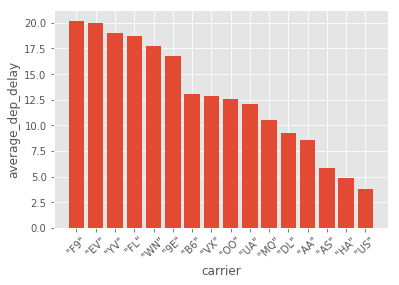

In [80]:
_.bar()

As we can see above, "F9" airline has overall highest average depature delay among distinct arilines. It has average around 20 minutes depature delay. "US" airline does the best job, it has average around 3.8 minutes depature delay. 

In [81]:
%%sql
SELECT carrier, ROUND(AVG(arr_delay),2) as average_arr_delay 
FROM flight_facts
JOIN airline
  ON flight_facts.airline_key = airline.airline_key
GROUP BY carrier
ORDER BY average_arr_delay DESC

 * postgresql://student@/project4
16 rows affected.


carrier,average_arr_delay
"""F9""",21.92
"""FL""",20.12
"""EV""",15.80
"""YV""",15.56
"""OO""",11.93
"""MQ""",10.77
"""WN""",9.65
"""B6""",9.46
"""9E""",7.38
"""UA""",3.56


<BarContainer object of 16 artists>

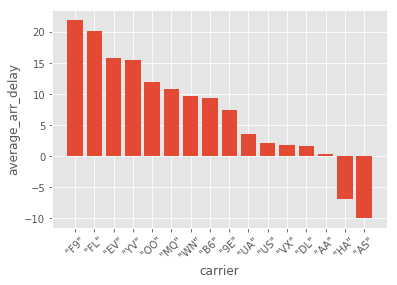

In [82]:
_.bar()

As we can see above, "F9" airline has overall highest average arrvial delay among distinct arilines. It is not surprising because it has overall highest average depature delay and this would correspondingly delay its arrival time. It has average around 22 minutes arrival delay. There are two interesting airlines that worth paying attention to -- "HA" and "AS" airlines. They even have negative average arrival delay, which means they arrived several minutes ahead of scheduled arrival time. 

* Does one airport have higher delays than others?

First we check which of New York City's 3 airports has the longest average delays on arriving and departing flights:

In [83]:
%%sql
SELECT name, ROUND(AVG(arr_delay),2) as average_arr_delay 
FROM flight_facts
JOIN airport
  ON flight_facts.origin_airport_key = airport.airport_key
GROUP BY name
HAVING AVG(arr_delay) IS NOT NULL 
ORDER BY average_arr_delay DESC
LIMIT 10

 * postgresql://student@/project4
3 rows affected.


name,average_arr_delay
"""EWR""",9.11
"""LGA""",5.78
"""JFK""",5.55


In [84]:
%%sql
SELECT name, ROUND(AVG(dep_delay),2) as average_dep_delay 
FROM flight_facts
JOIN airport
  ON flight_facts.origin_airport_key = airport.airport_key
---    where dep_delay>=0  looks like jfk, ewr and LGA airport have the highest delays if we use positive departure delays
---       where dep_delay<0 ---  same airports have highest negative delays
GROUP BY name
HAVING AVG(dep_delay) IS NOT NULL 
ORDER BY average_dep_delay DESC
LIMIT 10

--- [comment]: not sure why you have avg() is not null? is that necessary?

 * postgresql://student@/project4
3 rows affected.


name,average_dep_delay
"""EWR""",15.11
"""JFK""",12.11
"""LGA""",10.35


We discovered "EWR" did the worst job as it has average highest depature delay and arrival delay.

We now check which destination airports have the worst arrival and departure delays (we will only look at the top 5). 

In [85]:
%%sql
SELECT name, ROUND(AVG(arr_delay),2) as average_arr_delay 
FROM flight_facts
JOIN airport
  ON flight_facts.dest_airport_key = airport.airport_key
GROUP BY name
HAVING AVG(arr_delay) IS NOT NULL 
ORDER BY average_arr_delay DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.


name,average_arr_delay
"""CAE""",41.76
"""TUL""",33.66
"""OKC""",30.62
"""JAC""",28.10
"""TYS""",24.07


<BarContainer object of 5 artists>

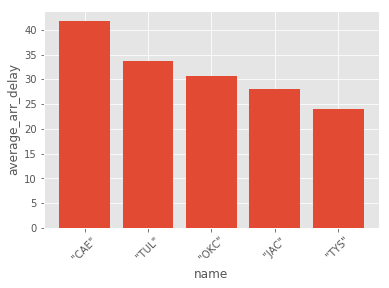

In [86]:
_.bar()

In [87]:
%%sql
SELECT name, ROUND(AVG(dep_delay),2) as average_dep_delay 
FROM flight_facts
JOIN airport
  ON flight_facts.dest_airport_key = airport.airport_key
GROUP BY name
HAVING AVG(dep_delay) IS NOT NULL 
ORDER BY average_dep_delay  DESC
LIMIT 5

 * postgresql://student@/project4
5 rows affected.


name,average_dep_delay
"""CAE""",35.57
"""TUL""",34.91
"""OKC""",30.57
"""BHM""",29.69
"""TYS""",28.49


<BarContainer object of 5 artists>

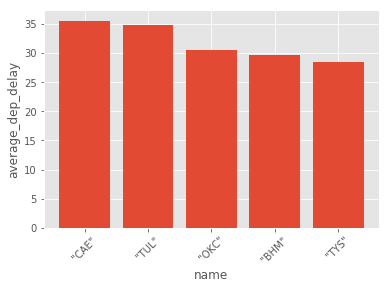

In [88]:
_.bar()

We can see that "CAE" (Columbia, SC), "TUL" (Tulsa, OK) and "OKC" (Oklahoma City, OK) are the top 3 most delayed airports for both departure delay and arrival delay. Along with "JAC" (Jackson Hole, WY), "TYS" (Blount County, TN), and "BHM" (Birmingham, AL), we can conclude that smaller and more rural airports tend to have worse delays.

* Do delays depend on the day of week?

From frequency

In [89]:
%%sql
SELECT COUNT(*), week_day
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
WHERE dep_delay > 0
GROUP BY week_day
ORDER BY COUNT(*) DESC

-- [comment] why you used dep_delay>0?

 * postgresql://student@/project4
7 rows affected.


count,week_day
21007,Thursday
20719,Friday
19845,Monday
18208,Wednesday
17951,Tuesday
17487,Sunday
13215,Saturday


<BarContainer object of 7 artists>

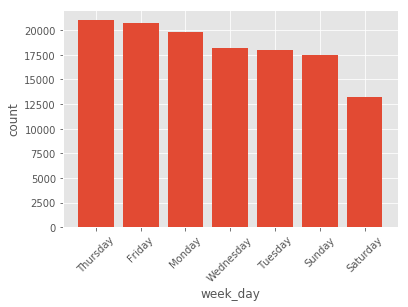

In [90]:
_.bar()

In [91]:
%%sql
SELECT COUNT(*), week_day
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key
WHERE arr_delay > 0
GROUP BY week_day
ORDER BY COUNT(*) DESC

-- [comment] why you used arr_delay>0?

 * postgresql://student@/project4
7 rows affected.


count,week_day
22070,Thursday
21043,Friday
20822,Monday
19961,Wednesday
19863,Tuesday
17189,Sunday
12056,Saturday


<BarContainer object of 7 artists>

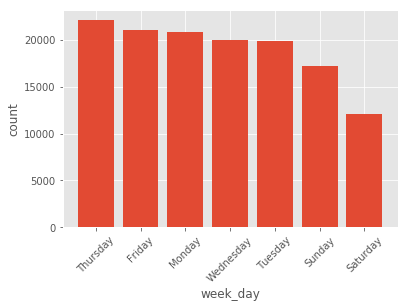

In [92]:
_.bar()

Here we can see that the days of the week that experience the worst delays, both in terms of departure and arrival, are Thursday, Friday and Monday. This is likely due to surges around business travel, where professionals travel from Monday to Thursday or Friday for work. 

* From average time

In [93]:
%%sql
SELECT ROUND(AVG(dep_delay),2), week_day
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
GROUP BY week_day
ORDER BY AVG(dep_delay) DESC

 * postgresql://student@/project4
7 rows affected.


round,week_day
16.15,Thursday
14.78,Monday
14.70,Friday
11.80,Wednesday
11.59,Sunday
10.63,Tuesday
7.65,Saturday


<BarContainer object of 7 artists>

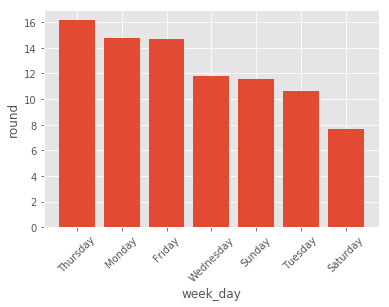

In [94]:
_.bar()

In [95]:
%%sql
SELECT ROUND(AVG(arr_delay),2), week_day
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key
GROUP BY week_day
ORDER BY AVG(arr_delay) DESC

 * postgresql://student@/project4
7 rows affected.


round,week_day
11.74,Thursday
9.65,Monday
9.07,Friday
7.05,Wednesday
5.39,Tuesday
4.82,Sunday
-1.45,Saturday


<BarContainer object of 7 artists>

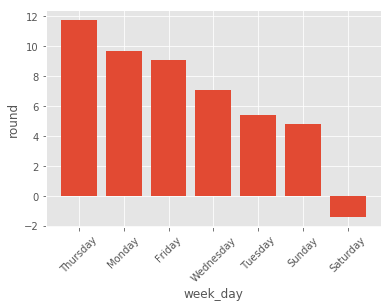

In [96]:
_.bar()

Here we can see that the days of the week that experience the worst delays minutes, both in terms of departure and arrival, are Thursday, Monday and Friday. They all suffered over 14 minutes depature delay and over 9 minutes arrival delay. There is one point that Saturday even has negative average arrival time, which means flights would arrive before the scheduled arrival time on Saturday. 

* Do delays depend on the time of day?

In [97]:
%%sql
SELECT hour AS sched_dep_hour, ROUND(AVG(dep_delay),2) AS average_dep_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key   
GROUP BY hour
HAVING ROUND(AVG(dep_delay),2) IS NOT NULL
ORDER BY hour

 * postgresql://student@/project4
19 rows affected.


sched_dep_hour,average_dep_delay
5,0.69
6,1.64
7,1.91
8,4.13
9,4.58
10,6.50
11,7.19
12,8.61
13,11.44
14,13.82


<BarContainer object of 19 artists>

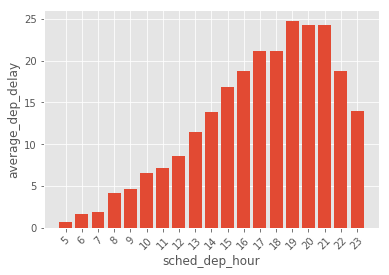

In [98]:
_.bar()

In [99]:
%%sql
SELECT hour AS sched_arr_hour, ROUND(AVG(arr_delay),2) AS average_arr_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key   
GROUP BY hour
HAVING ROUND(AVG(arr_delay),2) IS NOT NULL
ORDER BY hour

 * postgresql://student@/project4
23 rows affected.


sched_arr_hour,average_arr_delay
0,18.34
1,18.97
2,21.36
3,13.76
4,4.35
6,-3.54
7,-2.34
8,-2.99
9,-2.60
10,-2.83


<BarContainer object of 23 artists>

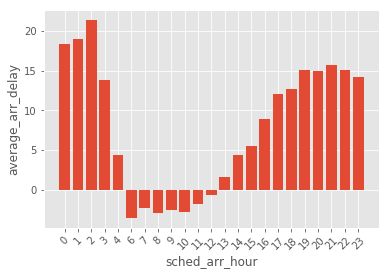

In [100]:
_.bar()

Here we can see that flights departing later in the evening, and arriving late in the evening through early hours of the morning, experience the worst delays. 

* Is there any relation between delay and month(season)?

In [101]:
%%sql
SELECT month , ROUND(AVG(dep_delay),2) as average_dep_delay
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
GROUP BY month
ORDER BY month

 * postgresql://student@/project4
12 rows affected.


month,average_dep_delay
1,10.04
2,10.82
3,13.23
4,13.94
5,12.99
6,20.85
7,21.73
8,12.61
9,6.72
10,6.24


<BarContainer object of 12 artists>

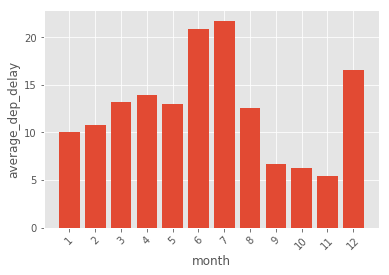

In [102]:
_.bar()

In [103]:
%%sql
SELECT month , ROUND(AVG(arr_delay),2) as average_arr_delay
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key
GROUP BY month
ORDER BY month

 * postgresql://student@/project4
12 rows affected.


month,average_arr_delay
1,6.13
2,5.61
3,5.81
4,11.18
5,3.52
6,16.48
7,16.71
8,6.04
9,-4.02
10,-0.17


<BarContainer object of 12 artists>

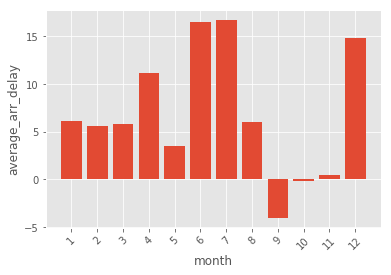

In [104]:
_.bar()

Delays appear to be caused or at least exacerbated by vacationers - June, July and December show the worst delays in and out of New York City airports, which are very common months for liesure travel in the United States. 

* Are longer flights more or less delayed than shorter flights?

In [105]:
%%sql
SELECT ROUND(AVG(air_time),2) FROM flight_facts

 * postgresql://student@/project4
1 rows affected.


round
150.69


Air time greater than 150 minutes is regarded as longer flight. Air time less than 150 minutes is regarded as shorter flight.

Longer flight:

In [106]:
%%sql
SELECT ROUND(AVG(arr_delay),2) AS average_arr_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key 
WHERE air_time > 150
ORDER BY average_arr_delay DESC

 * postgresql://student@/project4
1 rows affected.


average_arr_delay
5.59


shorter flight:

In [107]:
%%sql
SELECT ROUND(AVG(arr_delay),2) AS average_arr_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key 
WHERE air_time < 150
ORDER BY average_arr_delay DESC

 * postgresql://student@/project4
1 rows affected.


average_arr_delay
7.68


Arrival is more delayed on average for shorter flights.

* Are longer distance flights more or less delayed than shorter distance flights?

In [108]:
%%sql
SELECT ROUND(AVG(distance),2) FROM flight_facts

 * postgresql://student@/project4
1 rows affected.


round
1039.91


Distance greater than 1040 is regarded as long distance. Distance less than 1040 is regarded as short distance. 

Long distance:

In [109]:
%%sql
SELECT ROUND(AVG(arr_delay),2) AS average_arr_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key 
WHERE distance > 1040
ORDER BY average_arr_delay DESC

 * postgresql://student@/project4
1 rows affected.


average_arr_delay
3.40


Short distance:

In [110]:
%%sql
SELECT ROUND(AVG(arr_delay),2) AS average_arr_delay 
FROM flight_facts
JOIN time
  ON flight_facts.sched_arr_time_key = time.time_key 
WHERE distance < 1040
ORDER BY average_arr_delay DESC

 * postgresql://student@/project4
1 rows affected.


average_arr_delay
9.08


As with flight duration, arrival time is on average more delayed for short distance flights.

# Extra credit: Combining our flights data with weather data

In [111]:
!wget https://s3.amazonaws.com/dmfaproject/weather.csv

--2018-12-24 07:52:57--  https://s3.amazonaws.com/dmfaproject/weather.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.20.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.20.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2470872 (2.4M) [text/csv]
Saving to: ‘weather.csv.1’

weather.csv.1       100%[===================>]   2.36M  --.-KB/s    in 0.06s   

2018-12-24 07:52:57 (41.4 MB/s) - ‘weather.csv.1’ saved [2470872/2470872]



In [112]:
!csvcut -n weather.csv

  1: 
  2: origin
  3: year
  4: month
  5: day
  6: hour
  7: temp
  8: dewp
  9: humid
 10: wind_dir
 11: wind_speed
 12: wind_gust
 13: precip
 14: pressure
 15: visib
 16: time_hour


### Data descripution:
* origin: Origin airport
* year,month,day,hour: Time of recording
* temp: Temperature (in F)
* dewp: Dewpoint in F
* humid: Relative humidity
* wind_dir: Wind direction (in degrees)
* wind_speed: Speed (in mph)
* wind_gust: Gust speed (in mph)
* precip: Precipitation (in inches)
* pressure: Sea level pressure (in millibars)
* visib: Visibility (in miles)
* time_hour: Date and hour of the recording as a POSIXct date

### Extract the columns we need

In [113]:
!csvcut -C16 weather.csv| cat > weather_2.csv

In [114]:
!head weather_2.csv| csvlook

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
| a | origin |  year | month |  day | hour |  temp |  dewp | humid | wind_dir | wind_speed | wind_gust | precip | pressure | visib |
| - | ------ | ----- | ----- | ---- | ---- | ----- | ----- | ----- | -------- | ---------- | --------- | ------ | -------- | ----- |
| 1 | "EWR"  | 2,013 |  True | True |    0 | 37.04 | 21.92 | 53.97 |      230 |    10.357… |   11.919… |  False |  1,013.9 |    10 |
| 2 | "EWR"  | 2,013 |  True | True |    1 | 37.04 | 21.92 | 53.97 |      230 |    13.809… |   15.892… |  False |  1,013.0 |    10 |
| 3 | "EWR"  | 2,013 |  True | True |    2 | 37.94 | 21.92 | 52.09 |      230 |    12.659… |   14.567… |  False |  1,012.6 |    10 |
| 4 | "EWR"  | 2,013 |  True | True |    3 | 37.94 | 23.00 | 54.51 |      230 |    13.809… |   15.892… |  False |  1,012.7 |    10 |
| 5 | "EWR"  | 2,013 |  True | True |    4 | 37.94 | 24.08 | 57.04 |      240 |

In [115]:
!sed -i 's/,NA,/,,/g;s/,NA,/,,/g' weather_2.csv

In [116]:
!head -n 1000 weather_2.csv | csvstat

/home/ubuntu/.local/lib/python3.5/site-packages/agate/utils.py:276: UnnamedColumnWarning: Column 0 has no name. Using "a".
  1. "a"

	Type of data:          Number
	Contains null values:  False
	Unique values:         999
	Smallest value:        1
	Largest value:         999
	Sum:                   499,500
	Mean:                  500
	Median:                500
	StDev:                 288.531
	Most common values:    1 (1x)
	                       2 (1x)
	                       3 (1x)
	                       4 (1x)
	                       5 (1x)

  2. "origin"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1
	Longest value:         5 characters
	Most common values:    "EWR" (999x)

  3. "year"

	Type of data:          Number
	Contains null values:  False
	Unique values:         1
	Smallest value:        2,013
	Largest value:         2,013
	Sum:                   2,010,987
	Mean:                  2,013
	Median:                2,013
	StDev:            

It seems weather data is relatively clean, we can now build the table.

In [117]:
%%sql
DROP TABLE IF EXISTS weather;

CREATE TABLE weather (
    key SERIAL PRIMARY KEY,
    origin VARCHAR(8),
    year NUMERIC,
    month NUMERIC,
    day NUMERIC,
    hour NUMERIC,
    temp NUMERIC,
    dew_point NUMERIC,
    humidity NUMERIC,
    wind_dir_degrees NUMERIC,
    wind_speed NUMERIC,
    gust_speed NUMERIC,
    precipitation NUMERIC,
    pressure NUMERIC,
    visibility NUMERIC
)

 * postgresql://student@/project4
Done.
Done.


[]

In [118]:
!cp weather_2.csv /tmp/mydf.csv

In [119]:
%%sql
COPY weather FROM '/tmp/mydf.csv'
CSV
HEADER;

 * postgresql://student@/project4
26130 rows affected.


[]

In [120]:
%%sql
SELECT * from weather LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


key,origin,year,month,day,hour,temp,dew_point,humidity,wind_dir_degrees,wind_speed,gust_speed,precipitation,pressure,visibility
1,"""EWR""",2013,1,1,0,37.04,21.92,53.97,230,10.35702,11.91865148,0,1013.9,10
2,"""EWR""",2013,1,1,1,37.04,21.92,53.97,230,13.80936,15.8915353,0,1013,10
3,"""EWR""",2013,1,1,2,37.94,21.92,52.09,230,12.65858,14.56724069,0,1012.6,10
4,"""EWR""",2013,1,1,3,37.94,23,54.51,230,13.80936,15.8915353,0,1012.7,10
5,"""EWR""",2013,1,1,4,37.94,24.08,57.04,240,14.96014,17.21582991,0,1012.8,10
6,"""EWR""",2013,1,1,6,39.02,26.06,59.37,270,10.35702,11.91865148,0,1012,10
7,"""EWR""",2013,1,1,7,39.02,26.96,61.63,250,8.05546,9.270062259,0,1012.3,10
8,"""EWR""",2013,1,1,8,39.02,28.04,64.43,240,11.5078,13.24294608,0,1012.5,10
9,"""EWR""",2013,1,1,9,39.92,28.04,62.21,250,12.65858,14.56724069,0,1012.2,10
10,"""EWR""",2013,1,1,10,39.02,28.04,64.43,260,12.65858,14.56724069,0,1011.9,10


In order to match the data in `flights_facts`, we will need to create a combined 'date' column.

In [121]:
%%sql
ALTER TABLE weather ADD COLUMN date VARCHAR(50);

 * postgresql://student@/project4
Done.


[]

In [122]:
%%sql
UPDATE weather SET date = CONCAT(year, '-', month, '-', day);

 * postgresql://student@/project4
26130 rows affected.


[]

Now we add the foreign key column (weather_key) to the flight_facts table that reference weather dimension table.

In [123]:
%%sql
ALTER TABLE flight_facts 
ADD COLUMN weather_key INTEGER,
ADD CONSTRAINT fk_weather
    FOREIGN KEY (weather_key)
    REFERENCES weather (key);

 * postgresql://student@/project4
Done.


[]

In [124]:
%%sql
SELECT * 
FROM weather
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


key,origin,year,month,day,hour,temp,dew_point,humidity,wind_dir_degrees,wind_speed,gust_speed,precipitation,pressure,visibility,date
1911,"""EWR""",2013,3,21,18,37.04,15.08,40.24,0,0,0,0,1004.6,10,2013-3-21
3388,"""EWR""",2013,5,22,8,71.06,66.92,86.77,0,0,0,0,1011,10,2013-5-22
7071,"""EWR""",2013,10,23,3,51.08,35.96,56.05,0,0,0,0,1009.9,10,2013-10-23
7774,"""EWR""",2013,11,22,0,50,41,71.07,0,0,0,0,1031,10,2013-11-22
8908,"""JFK""",2013,1,9,8,35.06,32,88.47,0,0,0,0,1028.7,9,2013-1-9
9684,"""JFK""",2013,2,10,16,30.02,6.08,35.68,0,0,0,0,1032.1,10,2013-2-10
11587,"""JFK""",2013,5,1,3,48.92,33.08,54.15,0,0,0,0,1027.5,10,2013-5-1
18825,"""LGA""",2013,2,28,16,48.02,32,53.63,0,0,0,0,1001.1,10,2013-2-28
21604,"""LGA""",2013,6,24,13,82.94,68,60.74,0,0,0,0,1017.5,10,2013-6-24
22123,"""LGA""",2013,7,16,4,82.04,69.98,66.93,0,0,0,0,1021,10,2013-7-16


In [125]:
%%sql
SELECT * 
FROM airport
LEFT JOIN weather
ON weather.origin = airport.name 
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


airport_key,name,key,origin,year,month,day,hour,temp,dew_point,humidity,wind_dir_degrees,wind_speed,gust_speed,precipitation,pressure,visibility,date
22,"""EWR""",1911,"""EWR""",2013,3,21,18,37.04,15.08,40.24,0,0,0,0,1004.6,10,2013-3-21
22,"""EWR""",3388,"""EWR""",2013,5,22,8,71.06,66.92,86.77,0,0,0,0,1011,10,2013-5-22
22,"""EWR""",7071,"""EWR""",2013,10,23,3,51.08,35.96,56.05,0,0,0,0,1009.9,10,2013-10-23
22,"""EWR""",7774,"""EWR""",2013,11,22,0,50,41,71.07,0,0,0,0,1031,10,2013-11-22
83,"""JFK""",8908,"""JFK""",2013,1,9,8,35.06,32,88.47,0,0,0,0,1028.7,9,2013-1-9
83,"""JFK""",9684,"""JFK""",2013,2,10,16,30.02,6.08,35.68,0,0,0,0,1032.1,10,2013-2-10
83,"""JFK""",11587,"""JFK""",2013,5,1,3,48.92,33.08,54.15,0,0,0,0,1027.5,10,2013-5-1
12,"""LGA""",18825,"""LGA""",2013,2,28,16,48.02,32,53.63,0,0,0,0,1001.1,10,2013-2-28
12,"""LGA""",21604,"""LGA""",2013,6,24,13,82.94,68,60.74,0,0,0,0,1017.5,10,2013-6-24
12,"""LGA""",22123,"""LGA""",2013,7,16,4,82.04,69.98,66.93,0,0,0,0,1021,10,2013-7-16


In [126]:
%%sql
DROP INDEX IF EXISTS idx_weather;

CREATE INDEX idx_weather ON weather (origin,year,month,day,hour,temp,dew_point,humidity,wind_dir_degrees,wind_speed,gust_speed,precipitation,pressure,visibility);

 * postgresql://student@/project4
Done.
Done.


[]

In [127]:
%%sql
UPDATE flight_facts
SET weather_key = weather.key
FROM weather, airport, time
WHERE flight_facts.origin_airport_key = airport.airport_key AND airport.name = weather.origin AND flight_facts.sched_dep_time_key = time.time_key 
    AND time.month = weather.month AND time.day = weather.day AND time.hour = weather.hour 

 * postgresql://student@/project4
335563 rows affected.


[]

Some flights do not have weather captured because there are some missing values:

In [128]:
%%sql
SELECT COUNT(*)
FROM flight_facts
WHERE weather_key IS NULL 

 * postgresql://student@/project4
1 rows affected.


count
1213


In [129]:
%%sql
SELECT * FROM flight_facts 
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


date,dep_delay,arr_delay,air_time,distance,origin_airport_key,dest_airport_key,plane_key,airline_key,sched_dep_time_key,sched_arr_time_key,dep_time_key,arr_time_key,weather_key
2013-06-01,-7,-21,349,2586,83,1,1586,11,3723,3726,3722,3726,12335
2013-06-01,-1,-24,320,2475,83,17,863,11,3723,3726,3723,3725,12335
2013-06-01,-5,-21,134,1010,12,94,2465,16,3723,3726,3723,3726,21046
2013-06-01,1,-25,139,1065,22,49,3323,10,3723,3726,3723,3726,3627
2013-06-01,4,-21,144,1076,12,49,3234,11,3723,3726,3723,3725,21046
2013-06-01,19,5,83,583,22,99,822,2,3724,3726,3724,3726,3628
2013-06-01,1,3,350,2586,83,1,1293,1,3723,3726,3723,3726,12335
2013-06-01,-4,-3,333,2422,83,30,339,11,3723,3726,3723,3726,12335
2013-06-01,-4,-3,105,746,22,29,3812,11,3723,3726,3723,3725,3627
2013-06-01,-12,-36,108,733,12,74,694,10,3725,3726,3725,3726,21048


### Let's find out all flights that were delayed in departure by more than 10 hours and their weather condition

* In terms of hour

In [130]:
%%sql
SELECT time.hour as sched_dep_hour, 
    ROUND(AVG(dep_delay),2) as average_dep_delay, 
    ROUND(AVG(temp),2) as average_temp,
    ROUND(AVG(wind_speed),2) as average_wind_speed,
    ROUND(AVG(visibility),2) as average_visibility,
    ROUND(AVG(precipitation),2) as average_precipitation
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
Join weather
  ON flight_facts.weather_key = weather.key
GROUP BY sched_dep_hour
ORDER BY average_dep_delay DESC
LIMIT 20

 * postgresql://student@/project4
20 rows affected.


sched_dep_hour,average_dep_delay,average_temp,average_wind_speed,average_visibility,average_precipitation
1,None,75.92,10.36,10.00,0.00
19,24.82,60.40,12.63,9.25,0.00
21,24.32,59.10,12.07,9.36,0.00
20,24.25,60.21,12.40,9.32,0.00
18,21.15,60.23,12.31,9.25,0.00
17,21.13,60.49,12.01,9.26,0.00
16,18.77,58.24,11.89,9.23,0.00
22,18.76,56.79,12.73,9.34,0.00
15,16.96,58.67,11.02,9.15,0.00
23,14.06,55.84,12.34,9.26,0.00


It seems longer depature deplays have slightly positive relation with average temperature, average wind speed.

- In terms of date

In [131]:
%%sql
SELECT flight_facts.date as date, 
    ROUND(AVG(dep_delay),2) as average_dep_delay, 
    ROUND(AVG(temp),2) as average_temp,
    ROUND(AVG(wind_speed),2) as average_wind_speed,
    ROUND(AVG(visibility),2) as average_visibility,
    ROUND(AVG(precipitation),2) as average_precipitation
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
Join weather
  ON flight_facts.weather_key = weather.key
GROUP BY flight_facts.date
ORDER BY average_dep_delay DESC
LIMIT 20

 * postgresql://student@/project4
20 rows affected.


date,average_dep_delay,average_temp,average_wind_speed,average_visibility,average_precipitation
2013-03-08,83.54,33.36,16.38,2.42,0.02
2013-07-01,56.23,74.55,8.84,6.42,0.02
2013-07-10,52.86,80.01,9.61,8.73,0.00
2013-12-05,52.33,51.16,5.34,3.14,0.00
2013-09-02,52.30,77.06,4.59,5.91,0.01
2013-05-23,51.14,70.91,14.13,7.90,0.00
2013-09-12,49.96,78.39,9.80,7.60,0.00
2013-06-28,48.83,78.50,11.87,9.88,0.00
2013-06-24,47.16,82.28,9.71,9.31,0.00
2013-07-22,46.67,79.07,7.91,8.77,0.00


Here we can see that 2013-03-08 experienced the longest depature delayed. And the reason is quite obvious: the temperature is low and wind speed is high, combined with low visibility.

* In terms of month

In [132]:
%%sql
SELECT time.month, 
    ROUND(AVG(dep_delay),2) as average_dep_delay, 
    ROUND(AVG(temp),2) as average_temp,
    ROUND(AVG(wind_speed),2) as average_wind_speed,
    ROUND(AVG(precipitation),2) as average_precipitation,
    ROUND(AVG(visibility),2) as average_visibility
FROM flight_facts
JOIN time
  ON flight_facts.sched_dep_time_key = time.time_key
Join weather
  ON flight_facts.weather_key = weather.key
GROUP BY time.month
ORDER BY average_dep_delay DESC

 * postgresql://student@/project4
12 rows affected.


month,average_dep_delay,average_temp,average_wind_speed,average_precipitation,average_visibility
7,21.77,80.25,9.52,0.00,9.48
6,20.85,72.39,10.13,0.01,9.30
12,16.85,38.51,9.58,0.00,8.29
4,13.94,52.22,11.08,0.00,9.54
3,13.24,39.77,12.97,0.00,9.29
5,12.99,62.22,9.49,0.00,8.63
8,12.62,74.50,8.53,0.00,9.58
2,10.82,34.41,13.36,0.00,8.75
1,10.04,35.59,11.26,0.00,8.56
9,6.67,67.48,8.69,0.00,9.59


In [133]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
result = %sql SELECT flight_facts.date as date, ROUND(AVG(dep_delay),2) as average_dep_delay, ROUND(AVG(temp),2) as average_temp, ROUND(AVG(wind_speed),2) as average_wind_speed, ROUND(AVG(visibility),2) as average_visibility, ROUND(AVG(precipitation),2) as average_precipitation FROM flight_facts JOIN time ON flight_facts.sched_dep_time_key = time.time_key Join weather ON flight_facts.weather_key = weather.key GROUP BY flight_facts.date
df = result.DataFrame()

 * postgresql://student@/project4
364 rows affected.


We can visually check the correlation between departure delay and precipitation, where we see a gentle positive correlation:

Text(0.5,0,'Daily average departure delay')

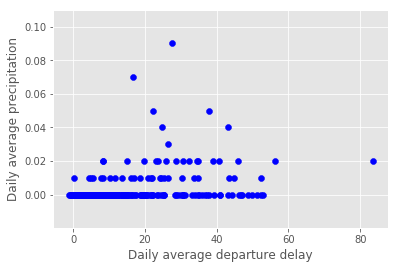

In [135]:
x = df.average_dep_delay
y = df.average_precipitation
plt.scatter(x, y, c='blue')
plt.ylabel('Daily average precipitation')
plt.xlabel('Daily average departure delay')

We can do the same for wind speed:

Text(0.5,0,'Daily average departure delay')

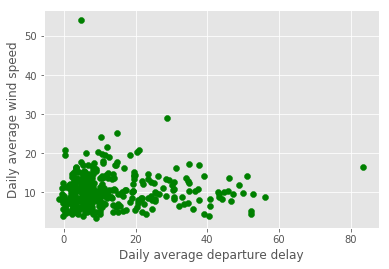

In [136]:
x = df.average_dep_delay
y = df.average_wind_speed
plt.scatter(x, y, c='green')
plt.ylabel('Daily average wind speed')
plt.xlabel('Daily average departure delay')

We can also check temperature:

Text(0.5,0,'Daily average departure delay')

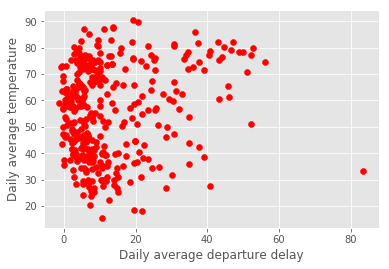

In [137]:
x = df.average_dep_delay
y = df.average_temp
plt.scatter(x, y, c='red')
plt.ylabel('Daily average temperature')
plt.xlabel('Daily average departure delay')

And finally, we can check visibility:

Text(0.5,0,'Daily average departure delay')

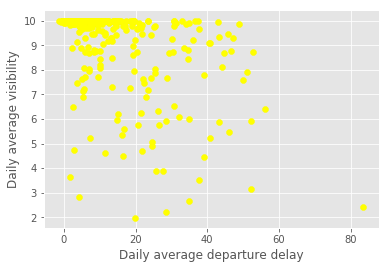

In [138]:
x = df.average_dep_delay
y = df.average_visibility
plt.scatter(x, y, c='yellow')
plt.ylabel('Daily average visibility')
plt.xlabel('Daily average departure delay')

Overall, the analysis on weather and delays only shows a weak relationship between different weather patterns (wind, temperature, visibility, etc.) and the magnidute of delays. There are two possible ways to explain this. First, one could argue that with all the technology currently being used in aviation, the weather really does not influence delays that much. Second, weather does in fact influence delays, but because we only looked at correlations between delays and weather we cannot see a clear relationship, since there are confounding effects (such as the day of the week, hour of day, month of year) also influencing delays. A next step for an analysis that builds on ours would be to investigate the _causal_ relationship between weather and delays.